# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nicholas Sidharta
- **Email:** toxicancm@gmail.com
- **ID Dicoding:** nicholas_sidharta

## Menentukan Pertanyaan Bisnis

- Whats the percentage of late deliveries? Among those late deliveries, whats the most occurence of late delivery (in days) compared to on-time delivery?
- Which city/cities does most of the customer come from geographically?

## Import Semua Packages/Library yang Digunakan

Install the libraries

In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the libraries that will be used in this project.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib

Freeze the requirements

In [4]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

#### Reading Data

In [5]:
data = './data/'
customers = pd.read_csv(data + 'customers_dataset.csv')
orders = pd.read_csv(data + 'orders_dataset.csv')
geolocation = pd.read_csv(data + 'geolocation_dataset.csv')

#### Print the first 5 rows of the customers dataframe

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Print the first 5 rows of the orders dataframe

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Print the first 5 rows of the Geolocation dataframe

In [8]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

Info for each dataframe

In [9]:
print("Customers")
customers.info()
print("=====================================")
print("Orders")
orders.info()
print("=====================================")
print("Geolocation")
geolocation.info()

Customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 no

Check for missing values

In [10]:
print("Customers Null Count")
print(customers.isnull().sum())
print("=====================================")
print("Orders Null Count")
print(orders.isnull().sum())
print("=====================================")
print("Geolocation Null Count")
print(geolocation.isnull().sum())

Customers Null Count
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Orders Null Count
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Geolocation Null Count
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Check percentage of missing values

In [11]:
print("Customers Null Percentage")
print((customers.isnull().sum() / len(customers))*100)
print("=====================================")
print("Orders Null Percentage")
print((orders.isnull().sum() / len(orders))*100)
print("=====================================")
print("Geolocation Null Percentage")
print((geolocation.isnull().sum() / len(geolocation))*100)

Customers Null Percentage
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
Orders Null Percentage
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
Geolocation Null Percentage
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64


Check for unique values

In [12]:
print("Customers Unique Count")
print(customers.nunique())
print("=====================================")
print("Orders Unique Count")
print(orders.nunique())
print("=====================================")
print("Geolocation Unique Count")
print(geolocation.nunique())

Customers Unique Count


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64
Orders Unique Count
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64
Geolocation Unique Count
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64


Check for duplicates

In [13]:
print("Customers Duplicates")
print(customers.duplicated().sum())
print("=====================================")
print("Orders Duplicates")
print(orders.duplicated().sum())
print("=====================================")
print("Geolocation Duplicates")
print(geolocation.duplicated().sum())

Customers Duplicates
0
Orders Duplicates
0
Geolocation Duplicates
261831


### Cleaning Data

Handle Null values for orders dataframe

In [14]:
for column in orders.columns:
    orders[column].fillna(orders[column].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10520\837658670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders[column].fillna(orders[column].mode()[0], inplace=True)


## Exploratory Data Analysis (EDA)

### Explore Customers Dataframe

Sample 5 data

In [15]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
94575,c43d99763db3d440eedf3efb8fedb524,9be6dbd1622937b7f2e7fbcd6338ba68,38180,araxa,MG
73190,775c4699698b1ee74e359daff3e7468c,33d32e24685b7eb8a64f475c476af5e8,8062,sao paulo,SP
2688,2592409d9cdb96ddbad1f10c30cd2b9a,878028a4d41bbb945295f5b196ca31df,87005,maringa,PR
88921,a71c8b5b9144227920fbb65d3de557c9,3a1cfe3d5de2dab1db203bb8efb9d553,40010,salvador,BA
36075,8289e9044e68003dfe33936c3c2c2799,f652abc552c8306a8bc86272a77ea5e8,20775,rio de janeiro,RJ


group by customer city and sort by customer count

In [16]:
customers.groupby('customer_city').size().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Length: 4119, dtype: int64

### Explore Orders Dataframe

Sample 5 data

In [17]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
14039,a00d80133807b3fcebee86be41116908,de4c540fcac301e3bf0dd6a9ffcfaa8a,delivered,2018-04-22 17:44:50,2018-04-24 18:35:49,2018-04-23 22:37:31,2018-04-25 22:56:48,2018-05-08 00:00:00
67637,ad286e926f0a816e7b604bd0c9db8b1c,be9aff62a55775448c9ded5e198350e5,delivered,2017-12-02 01:05:05,2017-12-05 04:12:09,2017-12-06 20:43:02,2017-12-22 20:09:10,2017-12-27 00:00:00
58982,68eb31d36231dd3fc97baf5cb6f73103,fc2c4598b5694563811540d01c98fbf6,delivered,2018-06-23 17:24:16,2018-06-23 17:38:04,2018-06-25 17:01:00,2018-06-29 20:12:28,2018-07-23 00:00:00
50285,7eb947ee7c01b2d8872bc456302687ac,669f2964029913b6ec6a29354302fbea,delivered,2018-02-03 20:37:59,2018-02-06 05:31:48,2018-02-07 21:09:02,2018-02-20 18:46:01,2018-03-05 00:00:00
29601,67c029563d7111f0c266898988cc30d7,f2a517cdb90d799c2c54fc8836978628,delivered,2018-05-03 14:05:39,2018-05-04 03:31:47,2018-05-04 15:45:00,2018-05-15 17:06:03,2018-05-25 00:00:00


describe the dataframe

In [18]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,169,1830,2968,522


### Explore Geolocation Dataframe

Sample 5 data

In [19]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
628063,37300,-21.741853,-44.314340,andrelandia,MG
102427,4702,-23.635704,-46.695364,são paulo,SP
628940,37430,-21.881939,-45.088021,conceicao do rio verde,MG
610457,36025,-21.776218,-43.355628,juiz de fora,MG
148855,6020,-23.533905,-46.760686,osasco,SP


describe the dataframe

In [20]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


## Visualization & Explanatory Analysis

### Pertanyaan 1: Whats the percentage of late deliveries? Among those late deliveries, whats the most occurence of late delivery (in days) compared to on-time delivery?

Check how many orders are late and on-time

In [21]:
late_deliveries = orders[pd.to_datetime(orders['order_delivered_customer_date']) > pd.to_datetime(orders['order_estimated_delivery_date'])]
late_deliveries = late_deliveries[pd.to_datetime(late_deliveries['order_delivered_customer_date']).dt.day != pd.to_datetime(late_deliveries['order_estimated_delivery_date']).dt.day]
num_late_deliveries = len(late_deliveries)
print("Number of orders delivered late:", num_late_deliveries)

on_time_deliveries = orders[pd.to_datetime(orders['order_delivered_customer_date']) <= pd.to_datetime(orders['order_estimated_delivery_date'])]
num_on_time_deliveries = len(on_time_deliveries)
print("Number of orders delivered on time:", num_on_time_deliveries)

Number of orders delivered late: 6520
Number of orders delivered on time: 91610


Percentage of late delivery

In [22]:
percent_late_deliveries = (num_late_deliveries / (num_late_deliveries + num_on_time_deliveries)) * 100
print("Percentage of late deliveries:", percent_late_deliveries, "%")

Percentage of late deliveries: 6.644247426882706 %


Visualize the percentage of late delivery

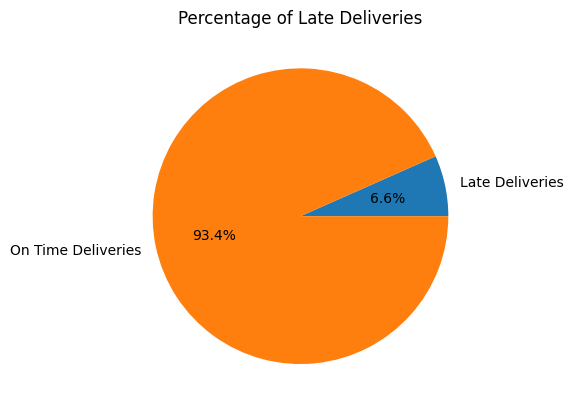

In [23]:
plt.pie([num_late_deliveries, num_on_time_deliveries], labels=['Late Deliveries', 'On Time Deliveries'], autopct='%1.1f%%')
plt.title('Percentage of Late Deliveries')
plt.show()

Distribution of late delivery in days

In [24]:
late_in_days = {}

for index, row in late_deliveries.iterrows():
    days_late = (pd.to_datetime(row['order_delivered_customer_date']) - pd.to_datetime(row['order_estimated_delivery_date'])).days
    if days_late in late_in_days:
        late_in_days[days_late] += 1
    else:
        late_in_days[days_late] = 1

late_in_days.pop(0, None)
    

In [25]:
print(sorted(late_in_days.items()))

[(1, 825), (2, 546), (3, 501), (4, 453), (5, 447), (6, 419), (7, 484), (8, 336), (9, 227), (10, 207), (11, 181), (12, 161), (13, 196), (14, 171), (15, 159), (16, 98), (17, 89), (18, 77), (19, 77), (20, 89), (21, 80), (22, 67), (23, 37), (24, 53), (25, 39), (26, 33), (27, 41), (28, 45), (29, 39), (30, 14), (31, 12), (32, 18), (33, 20), (34, 11), (35, 25), (36, 16), (37, 9), (38, 10), (39, 6), (40, 10), (41, 14), (42, 10), (43, 8), (44, 3), (45, 7), (46, 6), (47, 6), (48, 8), (49, 11), (50, 7), (51, 5), (52, 4), (53, 2), (54, 4), (55, 4), (56, 4), (57, 2), (58, 4), (59, 1), (60, 5), (63, 2), (65, 3), (66, 2), (67, 1), (68, 2), (69, 1), (70, 2), (72, 1), (73, 2), (74, 2), (75, 1), (76, 1), (77, 2), (78, 2), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (85, 1), (88, 1), (91, 1), (94, 1), (96, 4), (97, 1), (100, 1), (104, 5), (105, 1), (106, 1), (109, 2), (110, 1), (111, 1), (112, 1), (119, 1), (121, 1), (126, 1), (132, 2), (134, 2), (137, 1), (138, 1), (143, 1), (144, 1), (152, 1), (153, 1

Visualize the distribution of late delivery in days

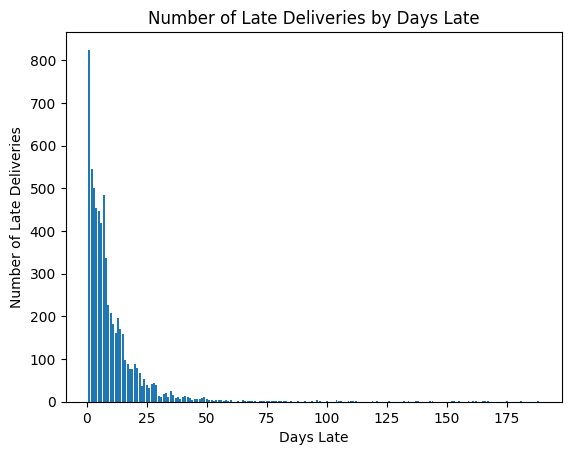

In [26]:
plt.bar(late_in_days.keys(), late_in_days.values())
plt.xlabel('Days Late')
plt.ylabel('Number of Late Deliveries')
plt.title('Number of Late Deliveries by Days Late')
plt.show()

### Pertanyaan 2: Which city/cities does most of the customer come from geographically?

### Using Geoanalysis to visualize the cities

Merge customers and geolocation dataframe

In [27]:
merged_coords = customers.merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
merged_coords = merged_coords.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
merged_coords.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194


Check if there are any missing values after merging the dataframe

In [28]:
print(merged_coords.isnull().sum())

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
dtype: int64


Drop the missing values since there are no other way to fill the missing values

In [29]:
merged_coords = merged_coords.dropna()

Map the coordinates of the cities and visualize the distribution of customers using folium

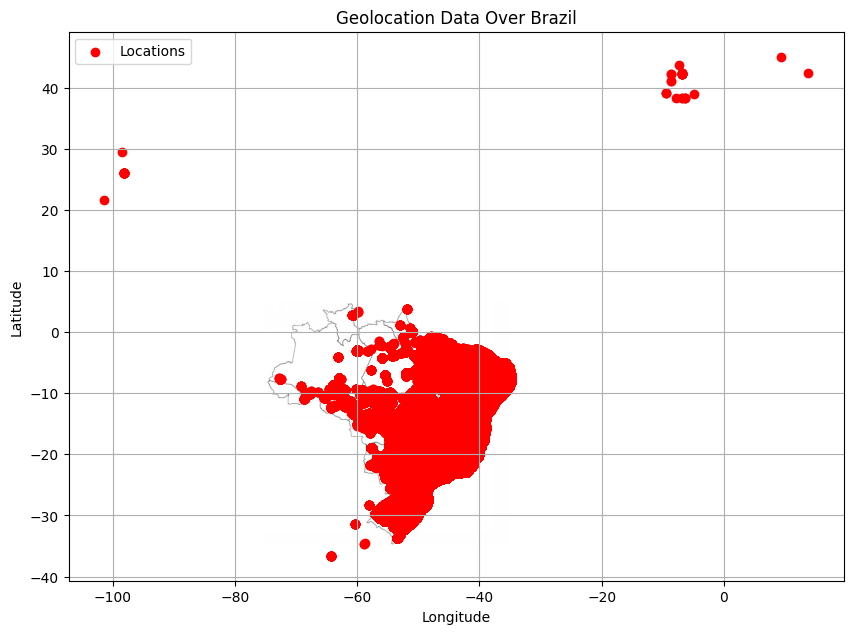

In [30]:
brazil_map = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')

plt.figure(figsize=(10, 8))
plt.imshow(brazil_map, extent=[-75, -35, -35, 5])

plt.scatter(merged_coords['geolocation_lng'], merged_coords['geolocation_lat'], color='red', marker='o', label='Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation Data Over Brazil')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  Based on the data analysis conducted, it was found that the percentage of delivery delays is 6.6%. From these delivery delays, it can be observed that the most common occurrence on the bar graph is for 1 day, thus it can be concluded that the most common delivery delay is 1 day from the initial delivery estimate.
- Conclution pertanyaan 2:
  Based on the data analysis conducted, it can be seen that orders occur frequently in the eastern region of Brazil. It can be estimated that the cities with the highest number of orders are in the areas of Sao Paulo and Rio de Janeiro.